# Early Detection of Child Malnutrition using Machine Learning

This notebook explores machine learning models for early detection of child malnutrition (stunting and wasting) using the Stunting Wasting Dataset from Kaggle.

## Objectives
1. Implement and compare various machine learning models for predicting child stunting
2. Explore different optimization techniques and their impact on model performance
3. Analyze feature importance and relationships in child malnutrition data
4. Create a reliable prediction model for early detection of stunting

## Dataset Information
- Source: Kaggle - Stunting Wasting Dataset
- Target Variable: Stunting (Binary Classification)
- Features: Gender, Age (months), Body Weight, Body Length
- Additional Target: Wasting (not used in this analysis)


# Step 1: Library Imports and Environment Setup

In this section, we import all necessary Python libraries for our analysis:

- **Data Manipulation**: numpy, pandas
- **Visualization**: matplotlib, seaborn
- **Machine Learning**: scikit-learn
- **Deep Learning**: tensorflow
- **Model Persistence**: joblib

We also set random seeds for reproducibility and configure the plotting style for consistent visualizations.


In [49]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.impute import SimpleImputer

# Deep Learning libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from google.colab import drive
drive.mount('/content/drive')

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)


# Load and display the dataset
# Define the path to your dataset in Google Drive
file_path = '/content/drive/MyDrive/notebook_data/stunting_wasting_dataset.csv'

# Read the CSV file
df = pd.read_csv(file_path)

# Configure plot style
# plt.style.use('seaborn')
sns.set_theme(style="whitegrid")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Step 2: Data Loading and Initial Exploration

We load the Stunting Wasting Dataset and perform initial exploratory analysis:

1. Display the first few rows to understand the data structure
2. Check data information (datatypes, non-null counts)
3. Generate summary statistics for numerical columns
4. Check for missing values

This step helps us understand:
- The size and shape of our dataset
- Data types of each column
- Presence of missing values
- Basic statistical properties of numerical features


In [2]:

print("Dataset Overview:")
print("-" * 50)
print("\nFirst few rows:")
display(df.head())

print("\nDataset Info:")
print("-" * 50)
df.info()

print("\nSummary Statistics:")
print("-" * 50)
display(df.describe())

print("\nMissing Values:")
print("-" * 50)
display(df.isnull().sum())


Dataset Overview:
--------------------------------------------------

First few rows:


,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting,Wasting
0,Laki-laki,19,91.6,13.3,Tall,Risk of Overweight
1,Laki-laki,20,77.7,8.5,Stunted,Underweight
2,Laki-laki,10,79.0,10.3,Normal,Risk of Overweight
3,Perempuan,2,50.3,8.3,Severely Stunted,Risk of Overweight
4,Perempuan,5,56.4,10.9,Severely Stunted,Risk of Overweight



Dataset Info:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis Kelamin      100000 non-null  object 
 1   Umur (bulan)       100000 non-null  int64  
 2   Tinggi Badan (cm)  100000 non-null  float64
 3   Berat Badan (kg)   100000 non-null  float64
 4   Stunting           100000 non-null  object 
 5   Wasting            100000 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 4.6+ MB

Summary Statistics:
--------------------------------------------------


,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg)
count,100000.000000,100000.000000,100000.000000
mean,11.992580,73.132657,9.259256
std,7.199671,11.360846,3.300780
min,0.000000,42.600000,1.000000
25%,6.000000,65.500000,6.900000
50%,12.000000,74.200000,9.200000
75%,18.000000,81.400000,11.700000
max,24.000000,97.600000,17.200000



Missing Values:
--------------------------------------------------


,0
Jenis Kelamin,0
Umur (bulan),0
Tinggi Badan (cm),0
Berat Badan (kg),0
Stunting,0
Wasting,0


# Step 3: Feature Engineering and Target Definition

In this step, we prepare our data for modeling:

1. **Column Renaming**:
   - Convert Indonesian column names to English for better readability
   - Standardize naming convention using underscores

2. **Feature Selection**:
   - X (Features): Gender, Age_Months, Body_Weight, Body_Length
   - y (Target): Stunting

This preprocessing step makes our data more accessible and ready for the next stages of analysis.


In [31]:
# Feature Engineering and Target Definition

# Rename columns for easier handling
column_mapping = {
    'Jenis Kelamin': 'Gender',
    'Umur (bulan)': 'Age_Months',
    'Tinggi Badan (cm)': 'Body_Length',
    'Berat Badan (kg)': 'Body_Weight',
    'Stunting': 'Stunting',
    'Wasting': 'Wasting'
}

# Rename the columns
df = df.rename(columns=column_mapping)

# Create gender mapping
gender_mapping = {
    'Laki-laki': 'Male',    # Laki-laki -> Male
    'Perempuan': 'Female'   # Perempuan -> Female
}

# Transform gender values
df['Gender'] = df['Gender'].replace(gender_mapping)

# Define features and target
X = df[['Gender', 'Age_Months', 'Body_Weight', 'Body_Length']]
y = df['Stunting']

# Display the updated column names and first few rows
print("Updated Column Names:")
print("-" * 50)
print(df.columns.tolist())
print("\nFirst few rows after transformation:")
print(df.head())


Updated Column Names:
--------------------------------------------------
['Gender', 'Age_Months', 'Body_Length', 'Body_Weight', 'Stunting', 'Wasting']

First few rows after transformation:
   Gender  Age_Months  Body_Length  Body_Weight          Stunting  \
0    Male          19         91.6         13.3              Tall   
1    Male          20         77.7          8.5           Stunted   
2    Male          10         79.0         10.3            Normal   
3  Female           2         50.3          8.3  Severely Stunted   
4  Female           5         56.4         10.9  Severely Stunted   

              Wasting  
0  Risk of Overweight  
1         Underweight  
2  Risk of Overweight  
3  Risk of Overweight  
4  Risk of Overweight  


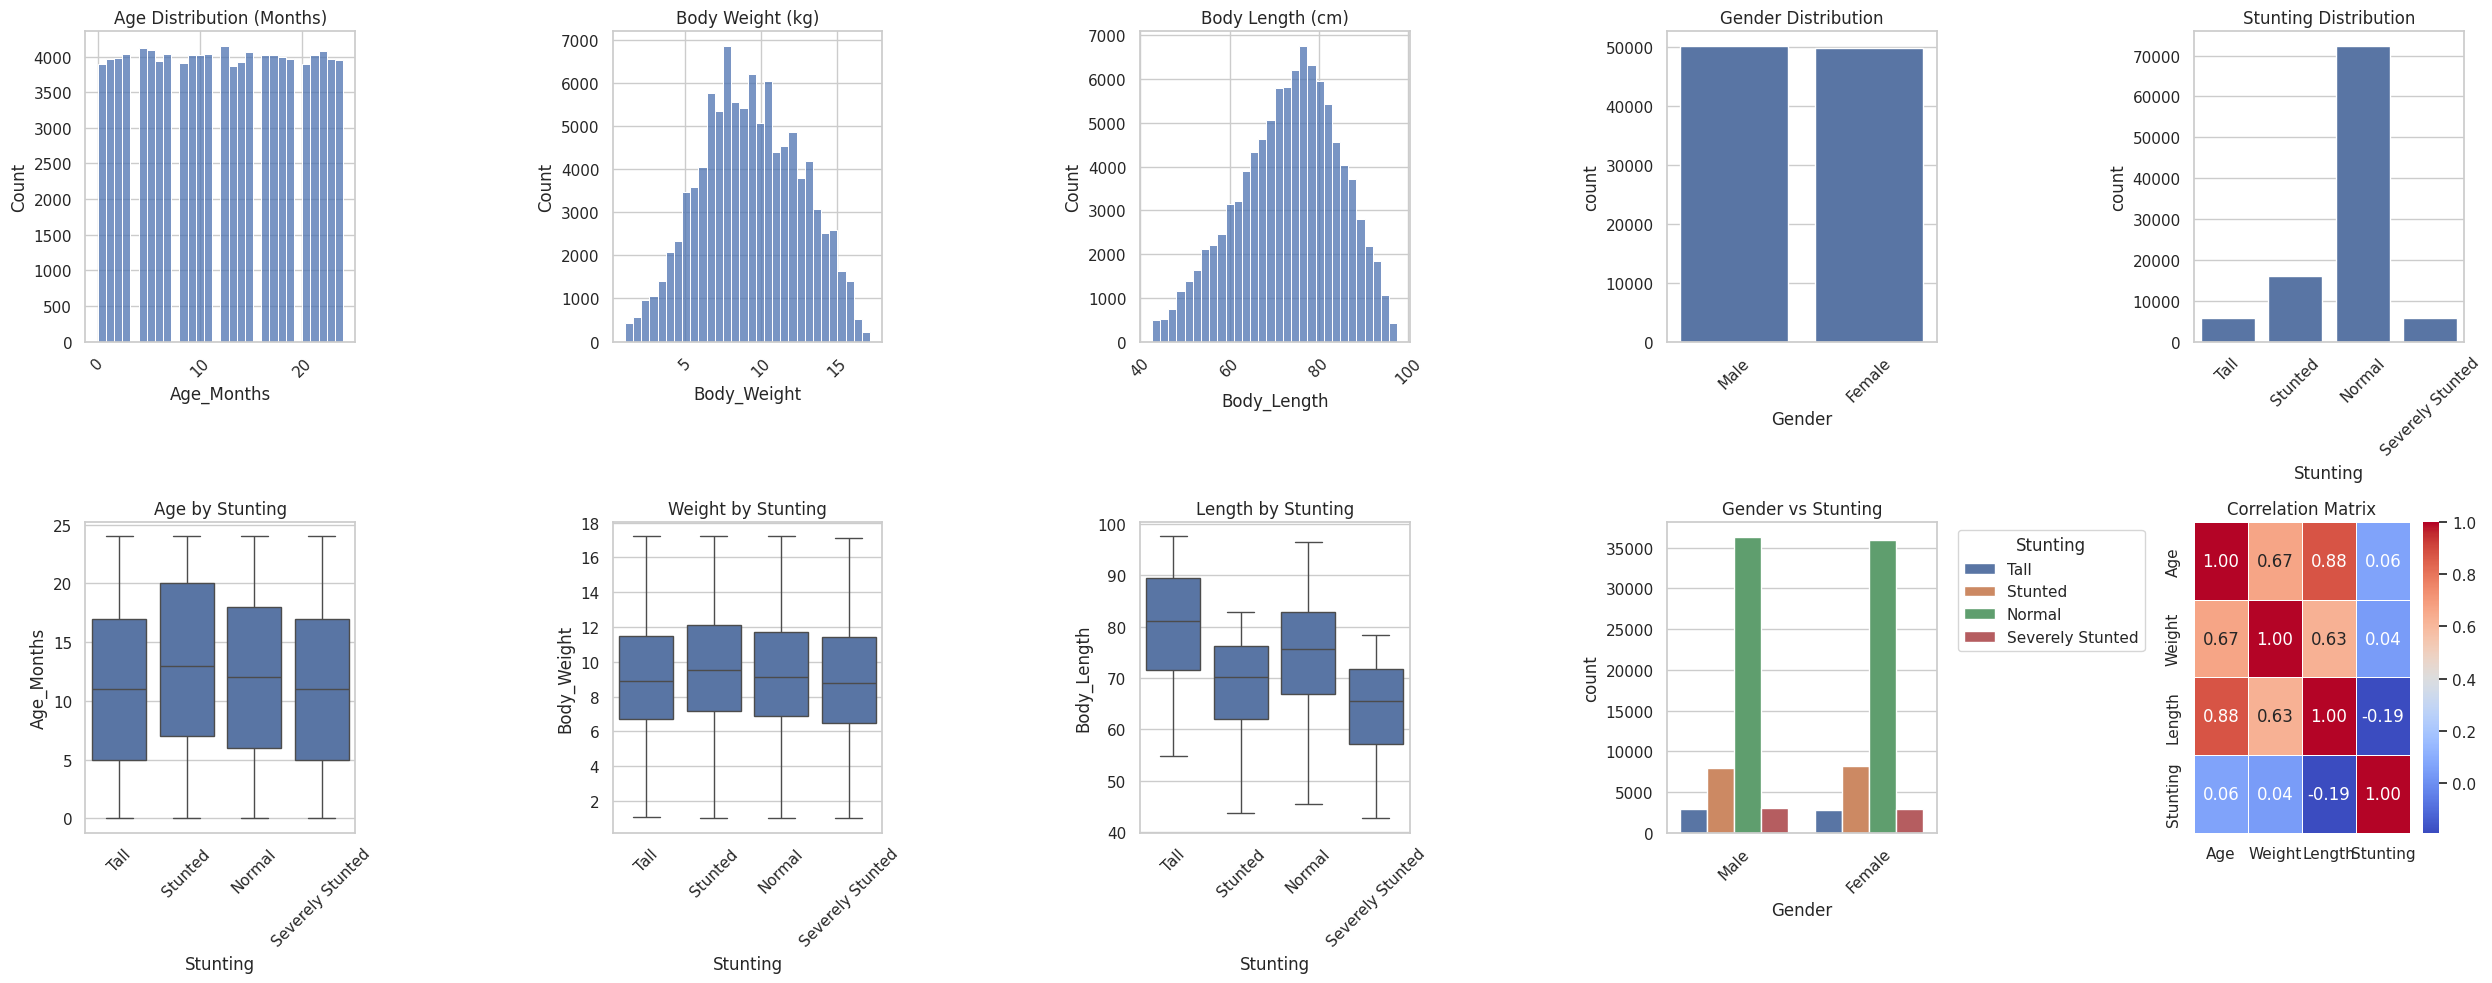

In [32]:
# Comprehensive Data Visualization
import numpy as np

# Create a figure with 5 plots per row
plt.figure(figsize=(25, 10))

# First row: All distribution plots
# 1. Age Distribution
plt.subplot(2, 5, 1)
sns.histplot(data=df, x='Age_Months', bins=30)
plt.title('Age Distribution (Months)')
plt.xticks(rotation=45)

# 2. Body Weight Distribution
plt.subplot(2, 5, 2)
sns.histplot(data=df, x='Body_Weight', bins=30)
plt.title('Body Weight (kg)')
plt.xticks(rotation=45)

# 3. Body Length Distribution
plt.subplot(2, 5, 3)
sns.histplot(data=df, x='Body_Length', bins=30)
plt.title('Body Length (cm)')
plt.xticks(rotation=45)

# 4. Gender Distribution
plt.subplot(2, 5, 4)
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')
plt.xticks(rotation=45)

# 5. Stunting Distribution
plt.subplot(2, 5, 5)
sns.countplot(data=df, x='Stunting')
plt.title('Stunting Distribution')
plt.xticks(rotation=45)

# Second row: Box plots and correlations
# 6. Age by Stunting
plt.subplot(2, 5, 6)
sns.boxplot(data=df, x='Stunting', y='Age_Months')
plt.title('Age by Stunting')
plt.xticks(rotation=45)

# 7. Weight by Stunting
plt.subplot(2, 5, 7)
sns.boxplot(data=df, x='Stunting', y='Body_Weight')
plt.title('Weight by Stunting')
plt.xticks(rotation=45)

# 8. Length by Stunting
plt.subplot(2, 5, 8)
sns.boxplot(data=df, x='Stunting', y='Body_Length')
plt.title('Length by Stunting')
plt.xticks(rotation=45)

# 9. Gender vs Stunting
plt.subplot(2, 5, 9)
sns.countplot(data=df, x='Gender', hue='Stunting')
plt.title('Gender vs Stunting')
plt.xticks(rotation=45)
plt.legend(title='Stunting', bbox_to_anchor=(1.05, 1), loc='upper left')

# 10. Correlation Heatmap
# Create binary encoding for Stunting status
stunting_encoded = np.where(df['Stunting'] == 'Stunted', 1, 0)

# Create correlation matrix using numpy arrays
age_months = df['Age_Months'].to_numpy()
body_weight = df['Body_Weight'].to_numpy()
body_length = df['Body_Length'].to_numpy()

# Stack the arrays and calculate correlation
numerical_data = np.vstack([age_months, body_weight, body_length, stunting_encoded])
correlation_matrix = np.corrcoef(numerical_data)

# Plot correlation heatmap
plt.subplot(2, 5, 10)
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5,
    xticklabels=['Age', 'Weight', 'Length', 'Stunting'],
    yticklabels=['Age', 'Weight', 'Length', 'Stunting']
)
plt.title('Correlation Matrix')

# Adjust layout
plt.tight_layout()
plt.show()


# Step 5: Data Preprocessing and Train-Test Split

We implement a modular preprocessing pipeline that handles:

1. **Missing Values**:
   - Numerical features: Median imputation
   - Categorical features: Mode imputation

2. **Feature Scaling**:
   - StandardScaler for numerical features
   - Ensures all features are on the same scale for neural networks

3. **Categorical Encoding**:
   - One-hot encoding for categorical variables (Gender)
   - Drop first category to avoid multicollinearity

4. **Data Splitting**:
   - Training set: 80%
   - Validation set: 10%
   - Test set: 10%
   - Stratified split to maintain class distribution

The preprocessing pipeline is wrapped in a function for easy reuse and consistency.


In [20]:
# First, let's check the actual column names
print("Current column names in the dataset:")
print(df.columns.tolist())

def preprocess_data(df, target_column='Stunting'):
    """
    Preprocess the data by handling missing values, encoding categorical variables,
    and scaling numerical features.
    """
    # Separate features and target
    X = df.drop([target_column, 'Wasting'], axis=1)
    y = df[target_column]

    # Define numerical and categorical columns using the English column names
    numerical_features = ['Age_Months', 'Body_Weight', 'Body_Length']
    categorical_features = ['Gender']

    # Create preprocessing pipelines
    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(drop='first', sparse_output=False))
    ])

    # Combine preprocessing steps
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    # Fit and transform the data
    X_processed = preprocessor.fit_transform(X)

    # Get feature names
    numerical_cols = numerical_features  # Already in English
    cat_encoder = preprocessor.named_transformers_['cat'].named_steps['onehot']
    categorical_cols = []
    for feat, vals in zip(categorical_features, cat_encoder.categories_):
        categorical_cols.extend([f"{feat}_{val}" for val in vals[1:]])

    # Create feature names as pandas Index
    feature_names = pd.Index(numerical_cols + categorical_cols)

    # Convert numpy array to DataFrame with proper column names
    X_processed_df = pd.DataFrame(X_processed, columns=feature_names)

    return X_processed_df, y, preprocessor

# Apply preprocessing
X_processed, y, preprocessor = preprocess_data(df)

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_processed, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Ensure all splits are pandas DataFrames
X_train = pd.DataFrame(X_train, columns=X_processed.columns)
X_val = pd.DataFrame(X_val, columns=X_processed.columns)
X_test = pd.DataFrame(X_test, columns=X_processed.columns)

# Print dataset splits information
print("\nDataset splits:")
print("-" * 50)
print(f"Training set:   {len(X_train):,} samples × {len(X_train.columns)} features")
print(f"Validation set: {len(X_val):,} samples × {len(X_val.columns)} features")
print(f"Test set:      {len(X_test):,} samples × {len(X_test.columns)} features")

# Print feature names
print("\nFeature names after preprocessing:")
print("-" * 50)
print("\n".join(X_processed.columns.tolist()))

Current column names in the dataset:
['Gender', 'Age_Months', 'Body_Length', 'Body_Weight', 'Stunting', 'Wasting']

Dataset splits:
--------------------------------------------------
Training set:   80,000 samples × 4 features
Validation set: 10,000 samples × 4 features
Test set:      10,000 samples × 4 features

Feature names after preprocessing:
--------------------------------------------------
Age_Months
Body_Weight
Body_Length
Gender_Male


# Step 6: Random Forest Model Implementation

We implement a Random Forest Classifier with the following components:

1. **Hyperparameter Tuning**:
   - Using GridSearchCV with 5-fold cross-validation
   - Parameters tuned:
     * Number of trees (n_estimators)
     * Maximum tree depth (max_depth)
     * Minimum samples for split
     * Minimum samples per leaf

2. **Model Evaluation**:
   - Accuracy, F1-score, Recall, and Precision
   - Confusion Matrix visualization
   - Feature importance plot

3. **Model Persistence**:
   - Save the best model using joblib
   - Store in saved_models directory

The Random Forest serves as a strong baseline and provides feature importance insights.


Training Random Forest model...
Performing parameter tuning on data subset...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters found: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Training final model on full dataset...


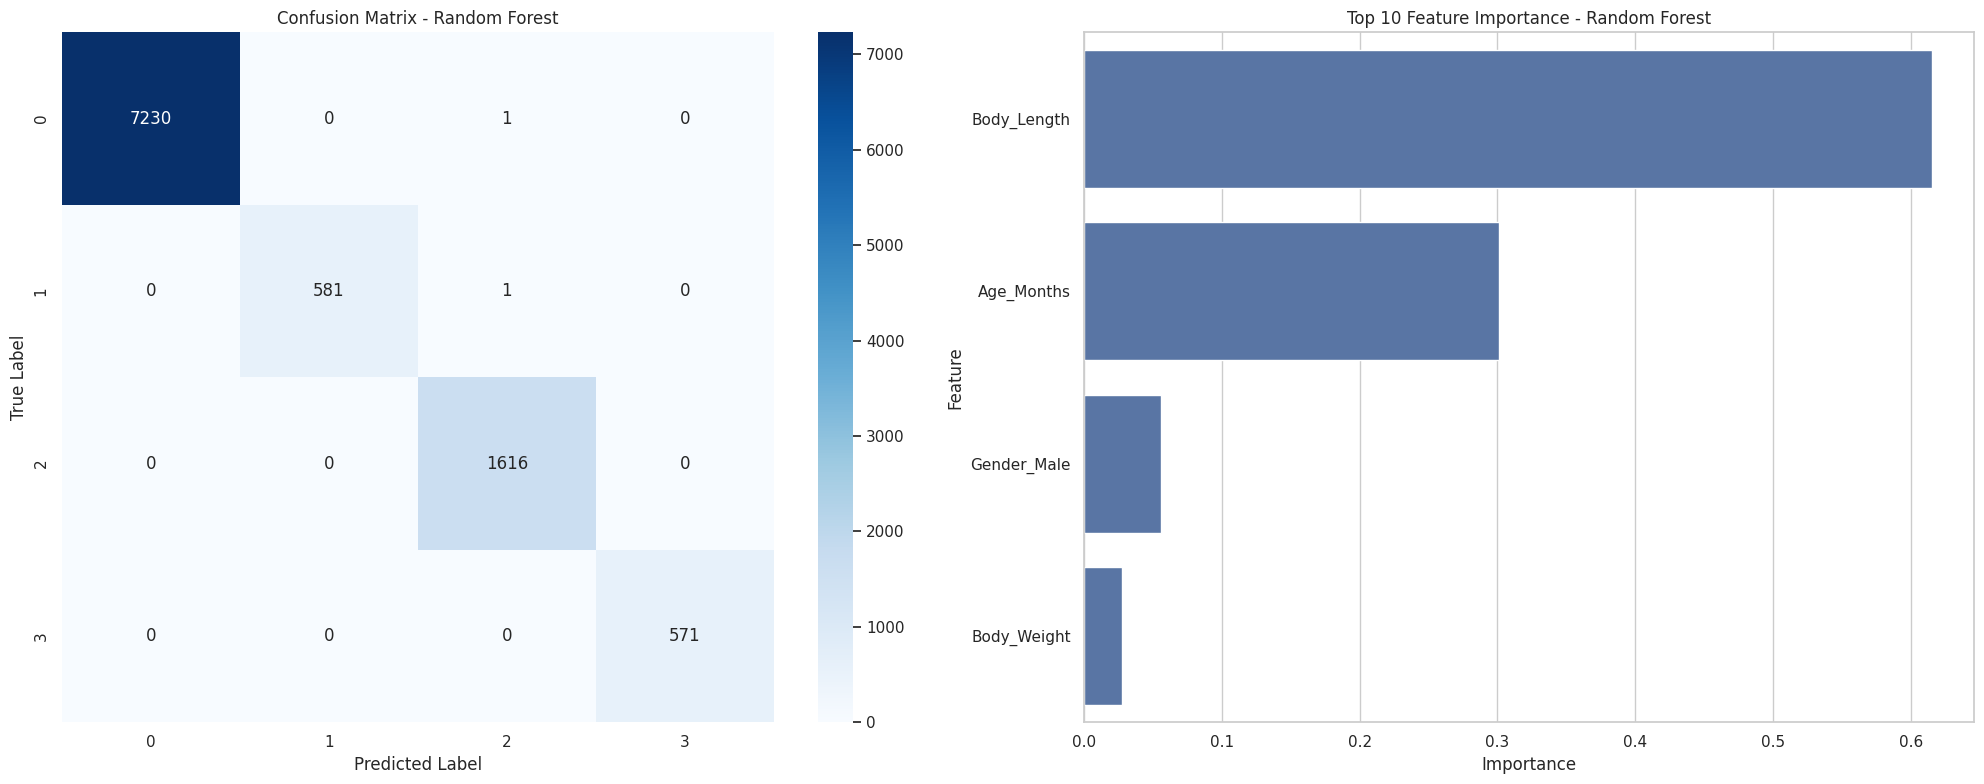


Random Forest Model Performance:
--------------------------------------------------
Accuracy: 0.9998
F1: 0.9998
Recall: 0.9998
Precision: 0.9998


['saved_models/random_forest_optimized.joblib']

In [13]:
def train_evaluate_rf(X_train, y_train, X_test, y_test, X_val, y_val, sample_size=10000):
    """
    Train and evaluate a Random Forest model with efficient hyperparameter tuning.
    Uses a subset of data for initial parameter tuning to speed up the process.

    Args:
        X_train, y_train: Training data
        X_test, y_test: Test data
        X_val, y_val: Validation data
        sample_size: Size of subset to use for parameter tuning (default: 10000)
    """
    # Use a subset of data for parameter tuning
    if X_train.shape[0] > sample_size:
        np.random.seed(42)  # For reproducibility
        if isinstance(X_train, pd.DataFrame):
            # For DataFrame, use sample method which handles indices correctly
            X_subset = X_train.sample(n=sample_size, random_state=42)
            y_subset = y_train[X_subset.index]
        else:
            # For numpy arrays, use choice
            indices = np.random.choice(X_train.shape[0], sample_size, replace=False)
            X_subset = X_train[indices]
            y_subset = y_train[indices]
    else:
        X_subset = X_train
        y_subset = y_train

    # Simplified parameter grid
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [5, 10]
    }

    # Initialize Random Forest
    rf = RandomForestClassifier(
        random_state=42,
        n_jobs=-1,  # Use all CPU cores
        class_weight='balanced'  # Handle class imbalance
    )

    # Perform GridSearchCV with reduced CV folds
    grid_search = GridSearchCV(
        estimator=rf,
        param_grid=param_grid,
        cv=3,  # Reduced from 5 to 3
        n_jobs=-1,
        scoring='f1_weighted',  # Changed to f1_weighted for multiclass
        verbose=1
    )

    # Fit on subset
    print("Performing parameter tuning on data subset...")
    grid_search.fit(X_subset, y_subset)

    # Get best parameters
    best_params = grid_search.best_params_
    print(f"Best parameters found: {best_params}")

    # Train final model on full dataset with best parameters
    print("Training final model on full dataset...")
    final_model = RandomForestClassifier(
        **best_params,
        random_state=42,
        n_jobs=-1,
        class_weight='balanced'
    )
    final_model.fit(X_train, y_train)

    # Make predictions
    y_pred = final_model.predict(X_test)

    # Calculate metrics with weighted average for multiclass
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred, average='weighted'),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'precision': precision_score(y_test, y_pred, average='weighted')
    }

    # Create a figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1)
    ax1.set_title('Confusion Matrix - Random Forest')
    ax1.set_ylabel('True Label')
    ax1.set_xlabel('Predicted Label')

    # Plot top 10 feature importance
    if isinstance(X_train, pd.DataFrame):
        feature_names = X_train.columns
    else:
        feature_names = [f'Feature {i}' for i in range(X_train.shape[1])]

    feature_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': final_model.feature_importances_
    }).sort_values('importance', ascending=False).head(10)

    sns.barplot(data=feature_importance, x='importance', y='feature', ax=ax2)
    ax2.set_title('Top 10 Feature Importance - Random Forest')
    ax2.set_xlabel('Importance')
    ax2.set_ylabel('Feature')

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

    return final_model, metrics

# Train and evaluate Random Forest model
print("Training Random Forest model...")
rf_model, rf_metrics = train_evaluate_rf(X_train, y_train, X_test, y_test, X_val, y_val)

print("\nRandom Forest Model Performance:")
print("-" * 50)
for metric, value in rf_metrics.items():
    print(f"{metric.capitalize()}: {value:.4f}")

# Save the model
import joblib
import os

# Create directory if it doesn't exist
os.makedirs('saved_models', exist_ok=True)
joblib.dump(rf_model, 'saved_models/random_forest_optimized.joblib')

# Step 7: Neural Network Implementation

We implement four different neural network configurations to explore various optimization techniques:

## Model Architectures

1. **Baseline Model (Instance 1)**:
   - Simple architecture with 2 hidden layers
   - Default Adam optimizer
   - No regularization
   - Fixed number of epochs

2. **L2 Regularized Model (Instance 2)**:
   - Same architecture as baseline
   - Adam optimizer with lower learning rate
   - L2 regularization to prevent overfitting
   - Early stopping for optimal training duration

3. **Dropout Model (Instance 3)**:
   - Deeper architecture with 3 hidden layers
   - RMSprop optimizer
   - Dropout layers for regularization
   - Fixed number of epochs

4. **L1 Regularized Model (Instance 4)**:
   - Same architecture as baseline
   - Adam optimizer with higher learning rate
   - L1 regularization for feature selection
   - Fixed number of epochs

Each model is evaluated using:
- Loss and accuracy curves
- Confusion matrix
- Classification metrics (Accuracy, F1-score, Recall, Precision)

Models are saved in HDF5 format for later use.


In [33]:
# First, let's check the current column names
print("Current column names in the dataset:")
print(df.columns.tolist())

def preprocess_data_for_nn(X, y):
    """
    Preprocess data for neural network training.
    - Converts numerical features to float32
    - One-hot encodes categorical features
    - Converts target to binary format
    """
    # Create a copy to avoid modifying original data
    X_processed = X.copy()

    # Convert numerical columns to float32
    numerical_cols = ['Age_Months', 'Body_Weight', 'Body_Length']
    for col in numerical_cols:
        X_processed[col] = X_processed[col].astype('float32')

    # One-hot encode categorical variables
    X_processed = pd.get_dummies(X_processed, columns=['Gender'])

    # Convert target variable to binary
    # Map 'Stunted' and 'Severely Stunted' to 1, others to 0
    y_binary = (y.isin(['Stunted', 'Severely Stunted'])).astype('float32')

    return X_processed, y_binary

# Split the data first (using English column names since they were already renamed)
X = df[['Gender', 'Age_Months', 'Body_Length', 'Body_Weight']]
y = df['Stunting']

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Preprocess training, validation, and test data
print("\nPreprocessing data for neural network...")
X_train_nn, y_train_nn = preprocess_data_for_nn(X_train, y_train)
X_val_nn, y_val_nn = preprocess_data_for_nn(X_val, y_val)
X_test_nn, y_test_nn = preprocess_data_for_nn(X_test, y_test)

print("\nData shapes after preprocessing:")
print(f"X_train_nn shape: {X_train_nn.shape}")
print(f"X_val_nn shape: {X_val_nn.shape}")
print(f"X_test_nn shape: {X_test_nn.shape}")
print(f"\nFeature names: {X_train_nn.columns.tolist()}")


Current column names in the dataset:
['Gender', 'Age_Months', 'Body_Length', 'Body_Weight', 'Stunting', 'Wasting']

Preprocessing data for neural network...

Data shapes after preprocessing:
X_train_nn shape: (70000, 5)
X_val_nn shape: (15000, 5)
X_test_nn shape: (15000, 5)

Feature names: ['Age_Months', 'Body_Length', 'Body_Weight', 'Gender_Female', 'Gender_Male']


In [37]:
# Neural Network Model Creation and Training Functions

def create_nn_model(input_dim, optimizer='adam', learning_rate=0.001,
                   regularizer_type=None, regularizer_strength=0.01,
                   dropout_rate=None, hidden_layers=[64, 32]):
    """
    Create a neural network model with specified configuration.
    """
    model = Sequential()

    # First hidden layer
    reg = None
    if regularizer_type == 'l1':
        reg = l1(regularizer_strength)
    elif regularizer_type == 'l2':
        reg = l2(regularizer_strength)

    # Input layer
    model.add(Dense(hidden_layers[0], activation='relu', input_dim=input_dim, kernel_regularizer=reg))
    if dropout_rate:
        model.add(Dropout(dropout_rate))

    # Hidden layers
    for units in hidden_layers[1:]:
        model.add(Dense(units, activation='relu', kernel_regularizer=reg))
        if dropout_rate:
            model.add(Dropout(dropout_rate))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Configure optimizer
    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    else:
        opt = RMSprop(learning_rate=learning_rate)

    # Compile model
    model.compile(optimizer=opt,
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

    return model

def train_evaluate_nn(model, X_train, y_train, X_test, y_test, X_val, y_val,
                     epochs=50, batch_size=32, use_early_stopping=False,
                     model_name='neural_network'):
    """
    Train and evaluate a neural network model.
    """
    callbacks = []
    if use_early_stopping:
        early_stopping = EarlyStopping(
            monitor='val_loss',
            patience=10,
            restore_best_weights=True
        )
        callbacks.append(early_stopping)

    # Model checkpoint
    checkpoint = ModelCheckpoint(
        f'saved_models/{model_name}.h5',
        monitor='val_loss',
        save_best_only=True
    )
    callbacks.append(checkpoint)

    # Train the model
    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_val, y_val),
        callbacks=callbacks,
        verbose=1
    )

    # Evaluate the model
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred, average='weighted'),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'precision': precision_score(y_test, y_pred, average='weighted')
    }

    return history, metrics

# Create directory for saved models if it doesn't exist
import os
os.makedirs('saved_models', exist_ok=True)

# Initialize results list to store all model performances
results = []

# Simple NN Baseline

In [39]:
# Instance 1: Simple NN (Baseline)
print("\nTraining Neural Network - Instance 1 (Baseline)")
print("-" * 50)

# Use preprocessed data dimensions
input_dim = X_train_nn.shape[1]
model1 = create_nn_model(
    input_dim=input_dim,    # Number of input features
    optimizer='adam',       # Using Adam optimizer with default settings
    hidden_layers=[64, 32]  # Two hidden layers with 64 and 32 neurons
)

# Convert pandas DataFrames to numpy arrays for training
X_train_arr = X_train_nn.values.astype('float32')
X_val_arr = X_val_nn.values.astype('float32')
X_test_arr = X_test_nn.values.astype('float32')
y_train_arr = y_train_nn.values.astype('float32')
y_val_arr = y_val_nn.values.astype('float32')
y_test_arr = y_test_nn.values.astype('float32')

# Train the model and get performance metrics
history1, metrics1 = train_evaluate_nn(
    model1, X_train_arr, y_train_arr, X_test_arr, y_test_arr, X_val_arr, y_val_arr,
    epochs=50,
    use_early_stopping=False,
    model_name='nn_model_instance1'
)

print("\nBaseline Model Performance:")
print("-" * 50)
for metric, value in metrics1.items():
    print(f"{metric.capitalize()}: {value:.4f}")

results.append({
    'name': 'Baseline NN',
    'config': 'Simple 2-layer, Adam (default)',
    'metrics': metrics1
})


Training Neural Network - Instance 1 (Baseline)
--------------------------------------------------
Epoch 1/50
2187/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7889 - loss: 0.4694

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7889 - loss: 0.4693 - val_accuracy: 0.8010 - val_loss: 0.4009
Epoch 2/50
2176/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8399 - loss: 0.3316

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8401 - loss: 0.3313 - val_accuracy: 0.9097 - val_loss: 0.1986
Epoch 3/50
2165/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9184 - loss: 0.1956

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9185 - loss: 0.1954 - val_accuracy: 0.9476 - val_loss: 0.1346
Epoch 4/50
2186/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9411 - loss: 0.1432

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9411 - loss: 0.1432 - val_accuracy: 0.9661 - val_loss: 0.1087
Epoch 5/50
2166/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9503 - loss: 0.1185

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9503 - loss: 0.1185 - val_accuracy: 0.9651 - val_loss: 0.0957
Epoch 6/50
2168/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9576 - loss: 0.1031

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9576 - loss: 0.1030 - val_accuracy: 0.9586 - val_loss: 0.0941
Epoch 7/50
2180/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9621 - loss: 0.0930

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9621 - loss: 0.0930 - val_accuracy: 0.9574 - val_loss: 0.0911
Epoch 8/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9634 - loss: 0.0885 - val_accuracy: 0.9551 - val_loss: 0.0925
Epoch 9/50
2169/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9644 - loss: 0.0855

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9644 - loss: 0.0855 - val_accuracy: 0.9546 - val_loss: 0.0910
Epoch 10/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9658 - loss: 0.0823 - val_accuracy: 0.9536 - val_loss: 0.0925
Epoch 11/50
2164/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9660 - loss: 0.0811

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9660 - loss: 0.0811 - val_accuracy: 0.9551 - val_loss: 0.0896
Epoch 12/50
2178/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9667 - loss: 0.0787

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9667 - loss: 0.0787 - val_accuracy: 0.9590 - val_loss: 0.0819
Epoch 13/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9681 - loss: 0.0753 - val_accuracy: 0.9576 - val_loss: 0.0851
Epoch 14/50
2163/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9686 - loss: 0.0739

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9686 - loss: 0.0739 - val_accuracy: 0.9586 - val_loss: 0.0803
Epoch 15/50
2174/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9693 - loss: 0.0731

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9694 - loss: 0.0731 - val_accuracy: 0.9605 - val_loss: 0.0771
Epoch 16/50
2178/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9701 - loss: 0.0714

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9701 - loss: 0.0714 - val_accuracy: 0.9681 - val_loss: 0.0633
Epoch 17/50
2180/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9699 - loss: 0.0711

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9699 - loss: 0.0711 - val_accuracy: 0.9731 - val_loss: 0.0561
Epoch 18/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9703 - loss: 0.0699 - val_accuracy: 0.9723 - val_loss: 0.0567
Epoch 19/50
2170/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9712 - loss: 0.0690

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9712 - loss: 0.0690 - val_accuracy: 0.9810 - val_loss: 0.0483
Epoch 20/50
2183/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9715 - loss: 0.0684

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9715 - loss: 0.0684 - val_accuracy: 0.9793 - val_loss: 0.0480
Epoch 21/50
2182/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9716 - loss: 0.0672

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9716 - loss: 0.0672 - val_accuracy: 0.9829 - val_loss: 0.0479
Epoch 22/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9706 - loss: 0.0687 - val_accuracy: 0.9813 - val_loss: 0.0522
Epoch 23/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9701 - loss: 0.0702 - val_accuracy: 0.9758 - val_loss: 0.0597
Epoch 24/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9713 - loss: 0.0677 - val_accuracy: 0.9767 - val_loss: 0.0573
Epoch 25/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9706 - loss: 0.0682 - val_accuracy: 0.9777 - val_loss: 0.0557
Epoch 26/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9698 - loss: 0.0695 - val_accuracy: 0.9779 - val_loss: 0.0542
Epoch 27/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9706 - loss: 0.0676 - val_accuracy: 0.9744 - val_loss: 0.0592
Epoch 28/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9706 - loss: 0.0689 - 

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9703 - loss: 0.0686 - val_accuracy: 0.9847 - val_loss: 0.0460
Epoch 32/50
2170/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9704 - loss: 0.0693

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9704 - loss: 0.0693 - val_accuracy: 0.9849 - val_loss: 0.0456
Epoch 33/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9705 - loss: 0.0689 - val_accuracy: 0.9841 - val_loss: 0.0458
Epoch 34/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9708 - loss: 0.0688 - val_accuracy: 0.9793 - val_loss: 0.0503
Epoch 35/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9709 - loss: 0.0663 - val_accuracy: 0.9828 - val_loss: 0.0460
Epoch 36/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9709 - loss: 0.0677 - val_accuracy: 0.9821 - val_loss: 0.0464
Epoch 37/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9710 - loss: 0.0671 - val_accuracy: 0.9810 - val_loss: 0.0474
Epoch 38/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9713 - loss: 0.0660 - val_accuracy: 0.9805 - val_loss: 0.0486
Epoch 39/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9717 - loss: 0.0660 - val

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9728 - loss: 0.0629 - val_accuracy: 0.9829 - val_loss: 0.0441
Epoch 45/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9731 - loss: 0.0631 - val_accuracy: 0.9821 - val_loss: 0.0443
Epoch 46/50
2171/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9731 - loss: 0.0620

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9732 - loss: 0.0619 - val_accuracy: 0.9815 - val_loss: 0.0433
Epoch 47/50
2182/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9733 - loss: 0.0623

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9733 - loss: 0.0623 - val_accuracy: 0.9838 - val_loss: 0.0413
Epoch 48/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9733 - loss: 0.0616 - val_accuracy: 0.9785 - val_loss: 0.0468
Epoch 49/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9737 - loss: 0.0609 - val_accuracy: 0.9712 - val_loss: 0.0581
Epoch 50/50
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9734 - loss: 0.0612 - val_accuracy: 0.9709 - val_loss: 0.0580
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Baseline Model Performance:
--------------------------------------------------
Accuracy: 0.9726
F1: 0.9719
Recall: 0.9726
Precision: 0.9735


# Instance 2: Adam with L2 Regularization and Early Stopping

In [45]:
# Instance 2: Adam with L2 Regularization and Early Stopping
print("\nTraining Neural Network - Instance 2 (L2 + Early Stopping)")
print("-" * 50)

model2 = create_nn_model(
    input_dim=input_dim,
    optimizer='adam',
    learning_rate=0.0001,
    regularizer_type='l2',
    regularizer_strength=0.001,
    hidden_layers=[64, 32]
)

# Train the model and get performance metrics
history2, metrics2 = train_evaluate_nn(
    model2, X_train_arr, y_train_arr, X_test_arr, y_test_arr, X_val_arr, y_val_arr,
    epochs=200,
    use_early_stopping=True,
    model_name='nn_model_instance2'
)

print("\nL2 Regularized Model Performance:")
print("-" * 50)
for metric, value in metrics2.items():
    print(f"{metric.capitalize()}: {value:.4f}")

results.append({
    'name': 'L2 Regularized NN',
    'config': 'Adam (LR=0.0001), L2, Early Stopping',
    'metrics': metrics2
})


Training Neural Network - Instance 2 (L2 + Early Stopping)
--------------------------------------------------
Epoch 1/200
2163/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7885 - loss: 0.6461

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.7886 - loss: 0.6445 - val_accuracy: 0.7957 - val_loss: 0.4703
Epoch 2/200
2169/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8005 - loss: 0.4606

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.8005 - loss: 0.4606 - val_accuracy: 0.8016 - val_loss: 0.4500
Epoch 3/200
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8054 - loss: 0.4412

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8054 - loss: 0.4412 - val_accuracy: 0.8051 - val_loss: 0.4322
Epoch 4/200
2174/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8087 - loss: 0.4235

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8088 - loss: 0.4235 - val_accuracy: 0.8075 - val_loss: 0.4145
Epoch 5/200
2175/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8116 - loss: 0.4056

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8116 - loss: 0.4056 - val_accuracy: 0.8116 - val_loss: 0.3956
Epoch 6/200
2183/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8152 - loss: 0.3867

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8152 - loss: 0.3867 - val_accuracy: 0.8181 - val_loss: 0.3752
Epoch 7/200
2172/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8207 - loss: 0.3666

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8208 - loss: 0.3665 - val_accuracy: 0.8267 - val_loss: 0.3540
Epoch 8/200
2181/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8301 - loss: 0.3456

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8302 - loss: 0.3455 - val_accuracy: 0.8401 - val_loss: 0.3326
Epoch 9/200
2170/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8432 - loss: 0.3245

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8432 - loss: 0.3245 - val_accuracy: 0.8563 - val_loss: 0.3114
Epoch 10/200
2166/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8596 - loss: 0.3041

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8597 - loss: 0.3040 - val_accuracy: 0.8725 - val_loss: 0.2914
Epoch 11/200
2167/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8789 - loss: 0.2850

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8789 - loss: 0.2849 - val_accuracy: 0.8873 - val_loss: 0.2734
Epoch 12/200
2183/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8960 - loss: 0.2674

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8960 - loss: 0.2674 - val_accuracy: 0.8992 - val_loss: 0.2575
Epoch 13/200
2168/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9104 - loss: 0.2518

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9104 - loss: 0.2518 - val_accuracy: 0.9080 - val_loss: 0.2436
Epoch 14/200
2185/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9222 - loss: 0.2380

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9222 - loss: 0.2380 - val_accuracy: 0.9153 - val_loss: 0.2316
Epoch 15/200
2179/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9310 - loss: 0.2258

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9310 - loss: 0.2258 - val_accuracy: 0.9215 - val_loss: 0.2213
Epoch 16/200
2181/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9385 - loss: 0.2151

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9385 - loss: 0.2151 - val_accuracy: 0.9263 - val_loss: 0.2123
Epoch 17/200
2170/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9436 - loss: 0.2058

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9436 - loss: 0.2057 - val_accuracy: 0.9297 - val_loss: 0.2045
Epoch 18/200
2187/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9475 - loss: 0.1975

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9475 - loss: 0.1975 - val_accuracy: 0.9328 - val_loss: 0.1976
Epoch 19/200
2185/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9507 - loss: 0.1901

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9507 - loss: 0.1901 - val_accuracy: 0.9351 - val_loss: 0.1914
Epoch 20/200
2172/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9532 - loss: 0.1836

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9533 - loss: 0.1835 - val_accuracy: 0.9374 - val_loss: 0.1859
Epoch 21/200
2170/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9555 - loss: 0.1777

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9555 - loss: 0.1777 - val_accuracy: 0.9397 - val_loss: 0.1808
Epoch 22/200
2186/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9576 - loss: 0.1723

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9576 - loss: 0.1723 - val_accuracy: 0.9411 - val_loss: 0.1762
Epoch 23/200
2184/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9591 - loss: 0.1675

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9591 - loss: 0.1675 - val_accuracy: 0.9425 - val_loss: 0.1720
Epoch 24/200
2160/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9609 - loss: 0.1632

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9609 - loss: 0.1632 - val_accuracy: 0.9449 - val_loss: 0.1682
Epoch 25/200
2184/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9624 - loss: 0.1591

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9624 - loss: 0.1591 - val_accuracy: 0.9459 - val_loss: 0.1647
Epoch 26/200
2174/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9636 - loss: 0.1555

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9636 - loss: 0.1554 - val_accuracy: 0.9475 - val_loss: 0.1614
Epoch 27/200
2184/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9646 - loss: 0.1520

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9646 - loss: 0.1520 - val_accuracy: 0.9488 - val_loss: 0.1583
Epoch 28/200
2180/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9651 - loss: 0.1489

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9651 - loss: 0.1489 - val_accuracy: 0.9505 - val_loss: 0.1554
Epoch 29/200
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9663 - loss: 0.1459

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9663 - loss: 0.1459 - val_accuracy: 0.9517 - val_loss: 0.1526
Epoch 30/200
2184/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9670 - loss: 0.1432

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9670 - loss: 0.1432 - val_accuracy: 0.9525 - val_loss: 0.1501
Epoch 31/200
2168/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9676 - loss: 0.1407

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9677 - loss: 0.1407 - val_accuracy: 0.9533 - val_loss: 0.1477
Epoch 32/200
2175/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9685 - loss: 0.1383

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9685 - loss: 0.1383 - val_accuracy: 0.9545 - val_loss: 0.1454
Epoch 33/200
2160/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9691 - loss: 0.1361

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9691 - loss: 0.1361 - val_accuracy: 0.9555 - val_loss: 0.1432
Epoch 34/200
2169/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9702 - loss: 0.1336

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9702 - loss: 0.1336 - val_accuracy: 0.9571 - val_loss: 0.1403
Epoch 35/200
2160/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9714 - loss: 0.1305

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9714 - loss: 0.1304 - val_accuracy: 0.9581 - val_loss: 0.1373
Epoch 36/200
2170/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9727 - loss: 0.1275

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9727 - loss: 0.1274 - val_accuracy: 0.9593 - val_loss: 0.1347
Epoch 37/200
2180/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9737 - loss: 0.1247

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9737 - loss: 0.1247 - val_accuracy: 0.9603 - val_loss: 0.1325
Epoch 38/200
2167/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9743 - loss: 0.1223

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9743 - loss: 0.1223 - val_accuracy: 0.9609 - val_loss: 0.1305
Epoch 39/200
2179/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9755 - loss: 0.1202

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9755 - loss: 0.1201 - val_accuracy: 0.9613 - val_loss: 0.1287
Epoch 40/200
2182/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9763 - loss: 0.1182

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9763 - loss: 0.1182 - val_accuracy: 0.9619 - val_loss: 0.1271
Epoch 41/200
2186/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9769 - loss: 0.1164

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9769 - loss: 0.1164 - val_accuracy: 0.9619 - val_loss: 0.1259
Epoch 42/200
2177/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9777 - loss: 0.1148

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9777 - loss: 0.1148 - val_accuracy: 0.9622 - val_loss: 0.1247
Epoch 43/200
2186/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9780 - loss: 0.1133

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9780 - loss: 0.1133 - val_accuracy: 0.9626 - val_loss: 0.1235
Epoch 44/200
2180/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9782 - loss: 0.1119

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9782 - loss: 0.1119 - val_accuracy: 0.9625 - val_loss: 0.1224
Epoch 45/200
2172/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9784 - loss: 0.1106

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9784 - loss: 0.1106 - val_accuracy: 0.9626 - val_loss: 0.1213
Epoch 46/200
2177/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9786 - loss: 0.1094

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9786 - loss: 0.1094 - val_accuracy: 0.9627 - val_loss: 0.1203
Epoch 47/200
2159/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9788 - loss: 0.1082

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9789 - loss: 0.1082 - val_accuracy: 0.9629 - val_loss: 0.1194
Epoch 48/200
2181/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9789 - loss: 0.1071

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9789 - loss: 0.1071 - val_accuracy: 0.9626 - val_loss: 0.1187
Epoch 49/200
2172/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9790 - loss: 0.1061

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9790 - loss: 0.1061 - val_accuracy: 0.9625 - val_loss: 0.1180
Epoch 50/200
2170/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9791 - loss: 0.1051

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9791 - loss: 0.1051 - val_accuracy: 0.9627 - val_loss: 0.1172
Epoch 51/200
2184/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9793 - loss: 0.1042

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9793 - loss: 0.1042 - val_accuracy: 0.9625 - val_loss: 0.1165
Epoch 52/200
2185/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9794 - loss: 0.1033

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9794 - loss: 0.1033 - val_accuracy: 0.9623 - val_loss: 0.1161
Epoch 53/200
2176/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9799 - loss: 0.1024

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9799 - loss: 0.1024 - val_accuracy: 0.9624 - val_loss: 0.1155
Epoch 54/200
2165/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9799 - loss: 0.1016

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9799 - loss: 0.1016 - val_accuracy: 0.9625 - val_loss: 0.1147
Epoch 55/200
2177/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9801 - loss: 0.1008

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9801 - loss: 0.1008 - val_accuracy: 0.9627 - val_loss: 0.1139
Epoch 56/200
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9801 - loss: 0.1001

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9801 - loss: 0.1001 - val_accuracy: 0.9627 - val_loss: 0.1133
Epoch 57/200
2163/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9801 - loss: 0.0993

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9801 - loss: 0.0993 - val_accuracy: 0.9632 - val_loss: 0.1125
Epoch 58/200
2166/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9802 - loss: 0.0986

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9802 - loss: 0.0986 - val_accuracy: 0.9638 - val_loss: 0.1118
Epoch 59/200
2169/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9802 - loss: 0.0979

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9802 - loss: 0.0979 - val_accuracy: 0.9640 - val_loss: 0.1111
Epoch 60/200
2168/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9802 - loss: 0.0972

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9802 - loss: 0.0972 - val_accuracy: 0.9642 - val_loss: 0.1105
Epoch 61/200
2186/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9804 - loss: 0.0966

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9804 - loss: 0.0966 - val_accuracy: 0.9644 - val_loss: 0.1098
Epoch 62/200
2166/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9804 - loss: 0.0960

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9804 - loss: 0.0960 - val_accuracy: 0.9648 - val_loss: 0.1092
Epoch 63/200
2176/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9806 - loss: 0.0954

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9806 - loss: 0.0954 - val_accuracy: 0.9649 - val_loss: 0.1086
Epoch 64/200
2173/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9806 - loss: 0.0948

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9806 - loss: 0.0948 - val_accuracy: 0.9651 - val_loss: 0.1080
Epoch 65/200
2170/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9806 - loss: 0.0943

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9806 - loss: 0.0942 - val_accuracy: 0.9653 - val_loss: 0.1073
Epoch 66/200
2173/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9807 - loss: 0.0937

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9807 - loss: 0.0937 - val_accuracy: 0.9659 - val_loss: 0.1066
Epoch 67/200
2176/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9808 - loss: 0.0932

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9808 - loss: 0.0932 - val_accuracy: 0.9662 - val_loss: 0.1059
Epoch 68/200
2176/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9809 - loss: 0.0926

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9809 - loss: 0.0926 - val_accuracy: 0.9668 - val_loss: 0.1051
Epoch 69/200
2181/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9811 - loss: 0.0921

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9811 - loss: 0.0921 - val_accuracy: 0.9668 - val_loss: 0.1044
Epoch 70/200
2183/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9813 - loss: 0.0916

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9813 - loss: 0.0916 - val_accuracy: 0.9673 - val_loss: 0.1037
Epoch 71/200
2168/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9813 - loss: 0.0911

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9813 - loss: 0.0910 - val_accuracy: 0.9673 - val_loss: 0.1031
Epoch 72/200
2174/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9814 - loss: 0.0905

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9814 - loss: 0.0905 - val_accuracy: 0.9677 - val_loss: 0.1025
Epoch 73/200
2163/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9814 - loss: 0.0901

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9814 - loss: 0.0901 - val_accuracy: 0.9679 - val_loss: 0.1019
Epoch 74/200
2174/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9816 - loss: 0.0896

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9816 - loss: 0.0896 - val_accuracy: 0.9683 - val_loss: 0.1013
Epoch 75/200
2175/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9815 - loss: 0.0891

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9815 - loss: 0.0891 - val_accuracy: 0.9685 - val_loss: 0.1007
Epoch 76/200
2172/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9815 - loss: 0.0887

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9815 - loss: 0.0887 - val_accuracy: 0.9685 - val_loss: 0.1002
Epoch 77/200
2172/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9814 - loss: 0.0882

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9814 - loss: 0.0882 - val_accuracy: 0.9689 - val_loss: 0.0997
Epoch 78/200
2174/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9815 - loss: 0.0878

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9815 - loss: 0.0878 - val_accuracy: 0.9691 - val_loss: 0.0993
Epoch 79/200
2185/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9816 - loss: 0.0874

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9816 - loss: 0.0874 - val_accuracy: 0.9695 - val_loss: 0.0988
Epoch 80/200
2169/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9816 - loss: 0.0870

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9816 - loss: 0.0870 - val_accuracy: 0.9697 - val_loss: 0.0982
Epoch 81/200
2187/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9815 - loss: 0.0866

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9815 - loss: 0.0866 - val_accuracy: 0.9699 - val_loss: 0.0978
Epoch 82/200
2171/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9815 - loss: 0.0862

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9815 - loss: 0.0862 - val_accuracy: 0.9701 - val_loss: 0.0973
Epoch 83/200
2178/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9816 - loss: 0.0858

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9816 - loss: 0.0858 - val_accuracy: 0.9702 - val_loss: 0.0969
Epoch 84/200
2174/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9818 - loss: 0.0855

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9818 - loss: 0.0855 - val_accuracy: 0.9705 - val_loss: 0.0963
Epoch 85/200
2177/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9818 - loss: 0.0851

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9818 - loss: 0.0851 - val_accuracy: 0.9705 - val_loss: 0.0960
Epoch 86/200
2178/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9818 - loss: 0.0847

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9818 - loss: 0.0847 - val_accuracy: 0.9706 - val_loss: 0.0955
Epoch 87/200
2168/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9818 - loss: 0.0844

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9818 - loss: 0.0844 - val_accuracy: 0.9709 - val_loss: 0.0951
Epoch 88/200
2187/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9819 - loss: 0.0841

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9819 - loss: 0.0841 - val_accuracy: 0.9709 - val_loss: 0.0947
Epoch 89/200
2182/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9819 - loss: 0.0837

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9819 - loss: 0.0837 - val_accuracy: 0.9709 - val_loss: 0.0943
Epoch 90/200
2165/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9818 - loss: 0.0834

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9818 - loss: 0.0834 - val_accuracy: 0.9711 - val_loss: 0.0938
Epoch 91/200
2186/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9818 - loss: 0.0831

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9818 - loss: 0.0831 - val_accuracy: 0.9713 - val_loss: 0.0934
Epoch 92/200
2171/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9819 - loss: 0.0827

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9819 - loss: 0.0827 - val_accuracy: 0.9713 - val_loss: 0.0930
Epoch 93/200
2174/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9820 - loss: 0.0824

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9820 - loss: 0.0824 - val_accuracy: 0.9715 - val_loss: 0.0927
Epoch 94/200
2165/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9821 - loss: 0.0821

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9821 - loss: 0.0821 - val_accuracy: 0.9715 - val_loss: 0.0923
Epoch 95/200
2187/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9822 - loss: 0.0818

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9822 - loss: 0.0818 - val_accuracy: 0.9716 - val_loss: 0.0920
Epoch 96/200
2180/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9821 - loss: 0.0815

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9821 - loss: 0.0815 - val_accuracy: 0.9718 - val_loss: 0.0917
Epoch 97/200
2180/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9821 - loss: 0.0812

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9821 - loss: 0.0812 - val_accuracy: 0.9718 - val_loss: 0.0914
Epoch 98/200
2167/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9823 - loss: 0.0810

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9823 - loss: 0.0809 - val_accuracy: 0.9718 - val_loss: 0.0913
Epoch 99/200
2162/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9821 - loss: 0.0807

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9821 - loss: 0.0807 - val_accuracy: 0.9722 - val_loss: 0.0910
Epoch 100/200
2167/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9826 - loss: 0.0803

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9826 - loss: 0.0803 - val_accuracy: 0.9725 - val_loss: 0.0906
Epoch 101/200
2177/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9827 - loss: 0.0800

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9827 - loss: 0.0800 - val_accuracy: 0.9729 - val_loss: 0.0901
Epoch 102/200
2164/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9826 - loss: 0.0797

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9826 - loss: 0.0797 - val_accuracy: 0.9729 - val_loss: 0.0897
Epoch 103/200
2183/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9827 - loss: 0.0795

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9827 - loss: 0.0795 - val_accuracy: 0.9731 - val_loss: 0.0893
Epoch 104/200
2172/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9826 - loss: 0.0792

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9826 - loss: 0.0792 - val_accuracy: 0.9733 - val_loss: 0.0889
Epoch 105/200
2173/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9826 - loss: 0.0789

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9826 - loss: 0.0789 - val_accuracy: 0.9732 - val_loss: 0.0885
Epoch 106/200
2176/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9826 - loss: 0.0786

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9826 - loss: 0.0786 - val_accuracy: 0.9733 - val_loss: 0.0881
Epoch 107/200
2174/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9826 - loss: 0.0784

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9826 - loss: 0.0784 - val_accuracy: 0.9733 - val_loss: 0.0877
Epoch 108/200
2187/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9826 - loss: 0.0781

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9826 - loss: 0.0781 - val_accuracy: 0.9734 - val_loss: 0.0874
Epoch 109/200
2167/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9826 - loss: 0.0779

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9827 - loss: 0.0779 - val_accuracy: 0.9735 - val_loss: 0.0870
Epoch 110/200
2169/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9826 - loss: 0.0776

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9826 - loss: 0.0776 - val_accuracy: 0.9736 - val_loss: 0.0867
Epoch 111/200
2186/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9827 - loss: 0.0773

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9827 - loss: 0.0773 - val_accuracy: 0.9739 - val_loss: 0.0863
Epoch 112/200
2175/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9827 - loss: 0.0771

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9827 - loss: 0.0771 - val_accuracy: 0.9739 - val_loss: 0.0860
Epoch 113/200
2177/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9827 - loss: 0.0769

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9827 - loss: 0.0769 - val_accuracy: 0.9741 - val_loss: 0.0857
Epoch 114/200
2178/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9828 - loss: 0.0766

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9828 - loss: 0.0766 - val_accuracy: 0.9741 - val_loss: 0.0853
Epoch 115/200
2182/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9827 - loss: 0.0764

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9827 - loss: 0.0764 - val_accuracy: 0.9742 - val_loss: 0.0850
Epoch 116/200
2171/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9827 - loss: 0.0762

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9827 - loss: 0.0761 - val_accuracy: 0.9742 - val_loss: 0.0847
Epoch 117/200
2185/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9828 - loss: 0.0759

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9828 - loss: 0.0759 - val_accuracy: 0.9744 - val_loss: 0.0844
Epoch 118/200
2176/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9828 - loss: 0.0757

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9828 - loss: 0.0757 - val_accuracy: 0.9746 - val_loss: 0.0841
Epoch 119/200
2184/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9828 - loss: 0.0755

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9828 - loss: 0.0755 - val_accuracy: 0.9747 - val_loss: 0.0838
Epoch 120/200
2166/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9829 - loss: 0.0752

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9829 - loss: 0.0752 - val_accuracy: 0.9747 - val_loss: 0.0835
Epoch 121/200
2187/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9829 - loss: 0.0750

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9829 - loss: 0.0750 - val_accuracy: 0.9749 - val_loss: 0.0832
Epoch 122/200
2178/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9829 - loss: 0.0748

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9829 - loss: 0.0748 - val_accuracy: 0.9751 - val_loss: 0.0829
Epoch 123/200
2181/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9829 - loss: 0.0746

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9829 - loss: 0.0746 - val_accuracy: 0.9752 - val_loss: 0.0826
Epoch 124/200
2170/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9830 - loss: 0.0744

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9830 - loss: 0.0744 - val_accuracy: 0.9753 - val_loss: 0.0823
Epoch 125/200
2171/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9829 - loss: 0.0742

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9829 - loss: 0.0742 - val_accuracy: 0.9755 - val_loss: 0.0820
Epoch 126/200
2177/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9829 - loss: 0.0740

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9829 - loss: 0.0740 - val_accuracy: 0.9758 - val_loss: 0.0818
Epoch 127/200
2180/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9829 - loss: 0.0738

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9829 - loss: 0.0738 - val_accuracy: 0.9760 - val_loss: 0.0815
Epoch 128/200
2185/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9829 - loss: 0.0736

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9829 - loss: 0.0736 - val_accuracy: 0.9762 - val_loss: 0.0812
Epoch 129/200
2173/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9829 - loss: 0.0734

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9829 - loss: 0.0734 - val_accuracy: 0.9763 - val_loss: 0.0810
Epoch 130/200
2177/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9830 - loss: 0.0732

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9830 - loss: 0.0732 - val_accuracy: 0.9763 - val_loss: 0.0807
Epoch 131/200
2169/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9831 - loss: 0.0730

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9831 - loss: 0.0730 - val_accuracy: 0.9765 - val_loss: 0.0804
Epoch 132/200
2162/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9831 - loss: 0.0728

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9831 - loss: 0.0728 - val_accuracy: 0.9767 - val_loss: 0.0802
Epoch 133/200
2183/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9832 - loss: 0.0726

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9832 - loss: 0.0726 - val_accuracy: 0.9767 - val_loss: 0.0799
Epoch 134/200
2164/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9832 - loss: 0.0724

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9832 - loss: 0.0724 - val_accuracy: 0.9769 - val_loss: 0.0797
Epoch 135/200
2175/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9832 - loss: 0.0722

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9832 - loss: 0.0722 - val_accuracy: 0.9769 - val_loss: 0.0794
Epoch 136/200
2182/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9832 - loss: 0.0720

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9832 - loss: 0.0720 - val_accuracy: 0.9771 - val_loss: 0.0792
Epoch 137/200
2183/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9832 - loss: 0.0718

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9832 - loss: 0.0718 - val_accuracy: 0.9771 - val_loss: 0.0789
Epoch 138/200
2183/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9832 - loss: 0.0716

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9832 - loss: 0.0716 - val_accuracy: 0.9771 - val_loss: 0.0787
Epoch 139/200
2174/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9832 - loss: 0.0714

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9832 - loss: 0.0714 - val_accuracy: 0.9772 - val_loss: 0.0784
Epoch 140/200
2186/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9832 - loss: 0.0713

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9832 - loss: 0.0713 - val_accuracy: 0.9774 - val_loss: 0.0782
Epoch 141/200
2181/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9833 - loss: 0.0711

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9833 - loss: 0.0711 - val_accuracy: 0.9774 - val_loss: 0.0780
Epoch 142/200
2187/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9833 - loss: 0.0709

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9833 - loss: 0.0709 - val_accuracy: 0.9777 - val_loss: 0.0778
Epoch 143/200
2180/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9834 - loss: 0.0707

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9834 - loss: 0.0707 - val_accuracy: 0.9773 - val_loss: 0.0775
Epoch 144/200
2166/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9835 - loss: 0.0704

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9835 - loss: 0.0704 - val_accuracy: 0.9772 - val_loss: 0.0773
Epoch 145/200
2163/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9835 - loss: 0.0702

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9835 - loss: 0.0702 - val_accuracy: 0.9775 - val_loss: 0.0771
Epoch 146/200
2180/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9835 - loss: 0.0700

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9835 - loss: 0.0700 - val_accuracy: 0.9777 - val_loss: 0.0768
Epoch 147/200
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9835 - loss: 0.0699

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9835 - loss: 0.0699 - val_accuracy: 0.9779 - val_loss: 0.0766
Epoch 148/200
2177/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9836 - loss: 0.0697

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9836 - loss: 0.0697 - val_accuracy: 0.9779 - val_loss: 0.0764
Epoch 149/200
2176/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9836 - loss: 0.0695

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9836 - loss: 0.0695 - val_accuracy: 0.9779 - val_loss: 0.0762
Epoch 150/200
2185/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9835 - loss: 0.0693

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9835 - loss: 0.0693 - val_accuracy: 0.9783 - val_loss: 0.0757
Epoch 151/200
2178/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9836 - loss: 0.0692

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9836 - loss: 0.0692 - val_accuracy: 0.9784 - val_loss: 0.0754
Epoch 152/200
2182/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9837 - loss: 0.0690

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9837 - loss: 0.0690 - val_accuracy: 0.9787 - val_loss: 0.0752
Epoch 153/200
2169/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9838 - loss: 0.0688

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9838 - loss: 0.0688 - val_accuracy: 0.9787 - val_loss: 0.0749
Epoch 154/200
2186/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9837 - loss: 0.0687

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9837 - loss: 0.0687 - val_accuracy: 0.9787 - val_loss: 0.0747
Epoch 155/200
2182/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9837 - loss: 0.0685

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9837 - loss: 0.0685 - val_accuracy: 0.9789 - val_loss: 0.0746
Epoch 156/200
2173/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9839 - loss: 0.0683

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9839 - loss: 0.0683 - val_accuracy: 0.9789 - val_loss: 0.0743
Epoch 157/200
2187/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9839 - loss: 0.0682

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9839 - loss: 0.0682 - val_accuracy: 0.9790 - val_loss: 0.0741
Epoch 158/200
2172/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9839 - loss: 0.0680

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9839 - loss: 0.0680 - val_accuracy: 0.9790 - val_loss: 0.0739
Epoch 159/200
2165/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9839 - loss: 0.0679

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9839 - loss: 0.0678 - val_accuracy: 0.9791 - val_loss: 0.0737
Epoch 160/200
2179/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9839 - loss: 0.0677

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9839 - loss: 0.0677 - val_accuracy: 0.9792 - val_loss: 0.0735
Epoch 161/200
2166/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9839 - loss: 0.0675

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9839 - loss: 0.0675 - val_accuracy: 0.9792 - val_loss: 0.0733
Epoch 162/200
2162/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9840 - loss: 0.0674

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9840 - loss: 0.0674 - val_accuracy: 0.9795 - val_loss: 0.0728
Epoch 163/200
2184/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9839 - loss: 0.0672

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9839 - loss: 0.0672 - val_accuracy: 0.9796 - val_loss: 0.0725
Epoch 164/200
2182/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9840 - loss: 0.0671

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9840 - loss: 0.0671 - val_accuracy: 0.9796 - val_loss: 0.0723
Epoch 165/200
2183/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9840 - loss: 0.0669

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9840 - loss: 0.0669 - val_accuracy: 0.9796 - val_loss: 0.0721
Epoch 166/200
2183/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9841 - loss: 0.0668

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9841 - loss: 0.0668 - val_accuracy: 0.9797 - val_loss: 0.0719
Epoch 167/200
2177/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9841 - loss: 0.0666

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9841 - loss: 0.0666 - val_accuracy: 0.9798 - val_loss: 0.0717
Epoch 168/200
2185/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9840 - loss: 0.0665

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9841 - loss: 0.0665 - val_accuracy: 0.9798 - val_loss: 0.0716
Epoch 169/200
2187/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9840 - loss: 0.0663

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9840 - loss: 0.0663 - val_accuracy: 0.9798 - val_loss: 0.0714
Epoch 170/200
2184/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9840 - loss: 0.0662

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9840 - loss: 0.0662 - val_accuracy: 0.9798 - val_loss: 0.0712
Epoch 171/200
2186/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9841 - loss: 0.0660

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9841 - loss: 0.0660 - val_accuracy: 0.9798 - val_loss: 0.0711
Epoch 172/200
2178/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9841 - loss: 0.0659

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9841 - loss: 0.0659 - val_accuracy: 0.9798 - val_loss: 0.0709
Epoch 173/200
2172/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9841 - loss: 0.0657

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9841 - loss: 0.0657 - val_accuracy: 0.9801 - val_loss: 0.0706
Epoch 174/200
2187/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9841 - loss: 0.0656

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9841 - loss: 0.0656 - val_accuracy: 0.9801 - val_loss: 0.0703
Epoch 175/200
2186/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9842 - loss: 0.0655

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9842 - loss: 0.0655 - val_accuracy: 0.9801 - val_loss: 0.0702
Epoch 176/200
2185/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9842 - loss: 0.0653

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9842 - loss: 0.0653 - val_accuracy: 0.9801 - val_loss: 0.0700
Epoch 177/200
2163/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9841 - loss: 0.0652

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9841 - loss: 0.0652 - val_accuracy: 0.9801 - val_loss: 0.0699
Epoch 178/200
2178/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9842 - loss: 0.0651

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9842 - loss: 0.0651 - val_accuracy: 0.9802 - val_loss: 0.0697
Epoch 179/200
2171/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9842 - loss: 0.0649

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9842 - loss: 0.0649 - val_accuracy: 0.9803 - val_loss: 0.0696
Epoch 180/200
2165/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9842 - loss: 0.0648

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9842 - loss: 0.0648 - val_accuracy: 0.9803 - val_loss: 0.0694
Epoch 181/200
2184/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9842 - loss: 0.0647

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9842 - loss: 0.0647 - val_accuracy: 0.9803 - val_loss: 0.0692
Epoch 182/200
2183/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9842 - loss: 0.0645

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9842 - loss: 0.0645 - val_accuracy: 0.9803 - val_loss: 0.0690
Epoch 183/200
2162/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9843 - loss: 0.0644

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9843 - loss: 0.0644 - val_accuracy: 0.9804 - val_loss: 0.0687
Epoch 184/200
2187/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9845 - loss: 0.0643

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9845 - loss: 0.0643 - val_accuracy: 0.9805 - val_loss: 0.0686
Epoch 185/200
2172/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9845 - loss: 0.0641

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9845 - loss: 0.0641 - val_accuracy: 0.9807 - val_loss: 0.0684
Epoch 186/200
2178/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9846 - loss: 0.0640

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9846 - loss: 0.0640 - val_accuracy: 0.9805 - val_loss: 0.0681
Epoch 187/200
2183/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9847 - loss: 0.0639

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9847 - loss: 0.0639 - val_accuracy: 0.9807 - val_loss: 0.0680
Epoch 188/200
2174/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9847 - loss: 0.0638

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9847 - loss: 0.0638 - val_accuracy: 0.9808 - val_loss: 0.0678
Epoch 189/200
2187/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9847 - loss: 0.0636

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9847 - loss: 0.0636 - val_accuracy: 0.9809 - val_loss: 0.0677
Epoch 190/200
2181/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9847 - loss: 0.0635

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9847 - loss: 0.0635 - val_accuracy: 0.9809 - val_loss: 0.0676
Epoch 191/200
2172/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9847 - loss: 0.0634

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9847 - loss: 0.0634 - val_accuracy: 0.9810 - val_loss: 0.0674
Epoch 192/200
2177/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9847 - loss: 0.0633

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9847 - loss: 0.0633 - val_accuracy: 0.9810 - val_loss: 0.0673
Epoch 193/200
2183/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9846 - loss: 0.0631

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9846 - loss: 0.0631 - val_accuracy: 0.9811 - val_loss: 0.0672
Epoch 194/200
2172/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9846 - loss: 0.0630

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9846 - loss: 0.0630 - val_accuracy: 0.9811 - val_loss: 0.0671
Epoch 195/200
2187/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9846 - loss: 0.0629

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9846 - loss: 0.0629 - val_accuracy: 0.9810 - val_loss: 0.0669
Epoch 196/200
2183/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9847 - loss: 0.0627

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9847 - loss: 0.0627 - val_accuracy: 0.9811 - val_loss: 0.0668
Epoch 197/200
2168/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9846 - loss: 0.0626

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9846 - loss: 0.0626 - val_accuracy: 0.9815 - val_loss: 0.0667
Epoch 198/200
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9848 - loss: 0.0625 - val_accuracy: 0.9813 - val_loss: 0.0668
Epoch 199/200
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9848 - loss: 0.0623 - val_accuracy: 0.9811 - val_loss: 0.0667
Epoch 200/200
2180/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9851 - loss: 0.0622

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9851 - loss: 0.0622 - val_accuracy: 0.9809 - val_loss: 0.0664
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

L2 Regularized Model Performance:
--------------------------------------------------
Accuracy: 0.9819
F1: 0.9816
Recall: 0.9819
Precision: 0.9822


# Instance 3: RMSprop with Dropout

In [46]:
# Instance 3: RMSprop with Dropout
print("\nTraining Neural Network - Instance 3 (RMSprop + Dropout)")
print("-" * 50)

model3 = create_nn_model(
    input_dim=input_dim,
    optimizer='rmsprop',
    dropout_rate=0.2,
    hidden_layers=[128, 64, 32]
)

# Train the model and get performance metrics
history3, metrics3 = train_evaluate_nn(
    model3, X_train_arr, y_train_arr, X_test_arr, y_test_arr, X_val_arr, y_val_arr,
    epochs=70,
    use_early_stopping=False,
    model_name='nn_model_instance3'
)

print("\nDropout Model Performance:")
print("-" * 50)
for metric, value in metrics3.items():
    print(f"{metric.capitalize()}: {value:.4f}")

results.append({
    'name': 'Dropout NN',
    'config': 'RMSprop, Dropout=0.2',
    'metrics': metrics3
})


Training Neural Network - Instance 3 (RMSprop + Dropout)
--------------------------------------------------
Epoch 1/70


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2169/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7643 - loss: 0.5613

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7645 - loss: 0.5607 - val_accuracy: 0.8023 - val_loss: 0.4149
Epoch 2/70
2166/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8223 - loss: 0.3802

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8226 - loss: 0.3797 - val_accuracy: 0.9059 - val_loss: 0.2259
Epoch 3/70
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8809 - loss: 0.2591 - val_accuracy: 0.7135 - val_loss: 0.5089
Epoch 4/70
2187/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8968 - loss: 0.2290

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8968 - loss: 0.2290 - val_accuracy: 0.9111 - val_loss: 0.1709
Epoch 5/70
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9079 - loss: 0.2111 - val_accuracy: 0.7411 - val_loss: 0.5372
Epoch 6/70
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9150 - loss: 0.1953 - val_accuracy: 0.7448 - val_loss: 0.5895
Epoch 7/70
2170/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9228 - loss: 0.1795

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9228 - loss: 0.1794 - val_accuracy: 0.9499 - val_loss: 0.1130
Epoch 8/70
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9284 - loss: 0.1693 - val_accuracy: 0.8358 - val_loss: 0.3570
Epoch 9/70
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9353 - loss: 0.1537 - val_accuracy: 0.7636 - val_loss: 0.6197
Epoch 10/70
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9382 - loss: 0.1478 - val_accuracy: 0.7862 - val_loss: 0.5607
Epoch 11/70
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9411 - loss: 0.1416 - val_accuracy: 0.7396 - val_loss: 0.7780
Epoch 12/70
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9446 - loss: 0.1352 - val_accuracy: 0.6569 - val_loss: 1.0640
Epoch 13/70
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9447 - loss: 0.1325 - val_accuracy: 0.7053 - val_loss: 0.9279
Epoch 14/70
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9463 - loss: 0.1279 - val

# Instance 4: Adam with L1 Regularization

In [47]:
# Instance 4: Adam with L1 Regularization
print("\nTraining Neural Network - Instance 4 (L1 + Higher LR)")
print("-" * 50)

model4 = create_nn_model(
    input_dim=input_dim,
    optimizer='adam',
    learning_rate=0.01,
    regularizer_type='l1',
    regularizer_strength=0.001,
    hidden_layers=[64, 32]
)

# Train the model and get performance metrics
history4, metrics4 = train_evaluate_nn(
    model4, X_train_arr, y_train_arr, X_test_arr, y_test_arr, X_val_arr, y_val_arr,
    epochs=100,
    use_early_stopping=False,
    model_name='nn_model_instance4'
)

print("\nL1 Regularized Model Performance:")
print("-" * 50)
for metric, value in metrics4.items():
    print(f"{metric.capitalize()}: {value:.4f}")

results.append({
    'name': 'L1 Regularized NN',
    'config': 'Adam (LR=0.01), L1',
    'metrics': metrics4
})


Training Neural Network - Instance 4 (L1 + Higher LR)
--------------------------------------------------
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2160/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7942 - loss: 0.5894

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7948 - loss: 0.5872 - val_accuracy: 0.9304 - val_loss: 0.2074
Epoch 2/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9225 - loss: 0.2079 - val_accuracy: 0.8422 - val_loss: 0.3640
Epoch 3/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9462 - loss: 0.1554 - val_accuracy: 0.9001 - val_loss: 0.2178
Epoch 4/100
2176/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9540 - loss: 0.1383

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9540 - loss: 0.1383 - val_accuracy: 0.9310 - val_loss: 0.1560
Epoch 5/100
2186/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9528 - loss: 0.1310

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9528 - loss: 0.1310 - val_accuracy: 0.9489 - val_loss: 0.1226
Epoch 6/100
2187/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9535 - loss: 0.1265

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9535 - loss: 0.1265 - val_accuracy: 0.9729 - val_loss: 0.0876
Epoch 7/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9558 - loss: 0.1236 - val_accuracy: 0.9739 - val_loss: 0.0877
Epoch 8/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9566 - loss: 0.1203 - val_accuracy: 0.9751 - val_loss: 0.0930
Epoch 9/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9590 - loss: 0.1172 - val_accuracy: 0.9725 - val_loss: 0.0922
Epoch 10/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9591 - loss: 0.1159 - val_accuracy: 0.9712 - val_loss: 0.0907
Epoch 11/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9596 - loss: 0.1141 - val_accuracy: 0.9700 - val_loss: 0.0921
Epoch 12/100
2171/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9600 - loss: 0.1141

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9600 - loss: 0.1141 - val_accuracy: 0.9765 - val_loss: 0.0865
Epoch 13/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9606 - loss: 0.1131 - val_accuracy: 0.9726 - val_loss: 0.0884
Epoch 14/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9611 - loss: 0.1131 - val_accuracy: 0.9731 - val_loss: 0.0882
Epoch 15/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9619 - loss: 0.1117 - val_accuracy: 0.9733 - val_loss: 0.0871
Epoch 16/100
2168/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9619 - loss: 0.1110

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9619 - loss: 0.1110 - val_accuracy: 0.9749 - val_loss: 0.0856
Epoch 17/100
2178/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9621 - loss: 0.1102

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9621 - loss: 0.1102 - val_accuracy: 0.9764 - val_loss: 0.0843
Epoch 18/100
2180/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9630 - loss: 0.1089

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9630 - loss: 0.1089 - val_accuracy: 0.9764 - val_loss: 0.0837
Epoch 19/100
2178/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9626 - loss: 0.1086

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9626 - loss: 0.1086 - val_accuracy: 0.9767 - val_loss: 0.0827
Epoch 20/100
2169/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9629 - loss: 0.1095

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9629 - loss: 0.1095 - val_accuracy: 0.9767 - val_loss: 0.0824
Epoch 21/100
2184/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9631 - loss: 0.1075

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9631 - loss: 0.1076 - val_accuracy: 0.9772 - val_loss: 0.0813
Epoch 22/100
2170/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9631 - loss: 0.1068

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9631 - loss: 0.1068 - val_accuracy: 0.9781 - val_loss: 0.0803
Epoch 23/100
2169/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9634 - loss: 0.1068

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9634 - loss: 0.1068 - val_accuracy: 0.9783 - val_loss: 0.0802
Epoch 24/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9640 - loss: 0.1056 - val_accuracy: 0.9779 - val_loss: 0.0805
Epoch 25/100
2168/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9642 - loss: 0.1053

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9642 - loss: 0.1053 - val_accuracy: 0.9781 - val_loss: 0.0794
Epoch 26/100
2182/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9646 - loss: 0.1043

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9646 - loss: 0.1043 - val_accuracy: 0.9787 - val_loss: 0.0786
Epoch 27/100
2177/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9646 - loss: 0.1033

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9646 - loss: 0.1033 - val_accuracy: 0.9787 - val_loss: 0.0779
Epoch 28/100
2164/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9648 - loss: 0.1030

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9648 - loss: 0.1031 - val_accuracy: 0.9792 - val_loss: 0.0772
Epoch 29/100
2184/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9648 - loss: 0.1024

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9648 - loss: 0.1024 - val_accuracy: 0.9785 - val_loss: 0.0771
Epoch 30/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9655 - loss: 0.1019 - val_accuracy: 0.9785 - val_loss: 0.0772
Epoch 31/100
2181/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9657 - loss: 0.1017

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9657 - loss: 0.1017 - val_accuracy: 0.9782 - val_loss: 0.0771
Epoch 32/100
2175/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9654 - loss: 0.1016

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9654 - loss: 0.1016 - val_accuracy: 0.9780 - val_loss: 0.0766
Epoch 33/100
2182/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9658 - loss: 0.1010

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9658 - loss: 0.1010 - val_accuracy: 0.9783 - val_loss: 0.0764
Epoch 34/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9656 - loss: 0.1007 - val_accuracy: 0.9781 - val_loss: 0.0767
Epoch 35/100
2177/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9658 - loss: 0.1004

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9658 - loss: 0.1004 - val_accuracy: 0.9779 - val_loss: 0.0759
Epoch 36/100
2181/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9661 - loss: 0.0992

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9661 - loss: 0.0992 - val_accuracy: 0.9776 - val_loss: 0.0756
Epoch 37/100
2168/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9660 - loss: 0.0987

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9660 - loss: 0.0987 - val_accuracy: 0.9776 - val_loss: 0.0753
Epoch 38/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9659 - loss: 0.0987 - val_accuracy: 0.9770 - val_loss: 0.0760
Epoch 39/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9660 - loss: 0.0980 - val_accuracy: 0.9770 - val_loss: 0.0758
Epoch 40/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9661 - loss: 0.0979 - val_accuracy: 0.9763 - val_loss: 0.0762
Epoch 41/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9661 - loss: 0.0976 - val_accuracy: 0.9763 - val_loss: 0.0772
Epoch 42/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9661 - loss: 0.0974 - val_accuracy: 0.9764 - val_loss: 0.0770
Epoch 43/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9661 - loss: 0.0973 - val_accuracy: 0.9761 - val_loss: 0.0774
Epoch 44/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9660 - loss: 0.097

# Instance 5: Logistic Regression with GridSearchCV

In [50]:
# Instance 5: Logistic Regression with GridSearchCV
print("\nTraining Logistic Regression Model")
print("-" * 50)

# Define the parameter grid for GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear'],  # liblinear supports both l1 and l2
    'max_iter': [1000],
    'class_weight': ['balanced']
}

# Create the logistic regression model
lr_model = LogisticRegression()

# Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=lr_model,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

print("\nPerforming Grid Search...")
# Fit the grid search
grid_search.fit(X_train_arr, y_train_arr)

# Get the best model
best_lr = grid_search.best_estimator_

print("\nBest Parameters:")
print("-" * 50)
for param, value in grid_search.best_params_.items():
    print(f"{param}: {value}")

# Make predictions
y_pred = best_lr.predict(X_test_arr)

# Calculate metrics
metrics_lr = {
    'accuracy': accuracy_score(y_test_arr, y_pred),
    'f1': f1_score(y_test_arr, y_pred, average='weighted'),
    'recall': recall_score(y_test_arr, y_pred, average='weighted'),
    'precision': precision_score(y_test_arr, y_pred, average='weighted')
}

print("\nLogistic Regression Model Performance:")
print("-" * 50)
for metric, value in metrics_lr.items():
    print(f"{metric.capitalize()}: {value:.4f}")

# Display confusion matrix
print("\nConfusion Matrix:")
print("-" * 50)
cm = confusion_matrix(y_test_arr, y_pred)
print(cm)

# Save the model
os.makedirs('saved_models', exist_ok=True)
joblib.dump(best_lr, 'saved_models/logistic_regression_tuned.joblib')

# Add to results
results.append({
    'name': 'Logistic Regression',
    'config': f"Best params: {grid_search.best_params_}",
    'metrics': metrics_lr
})


Training Logistic Regression Model
--------------------------------------------------

Performing Grid Search...
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Best Parameters:
--------------------------------------------------
C: 100
class_weight: balanced
max_iter: 1000
penalty: l1
solver: liblinear

Logistic Regression Model Performance:
--------------------------------------------------
Accuracy: 0.9054
F1: 0.9099
Recall: 0.9054
Precision: 0.9260

Confusion Matrix:
--------------------------------------------------
[[10447  1271]
 [  148  3134]]


# Step 8: Model Comparison and Selection

We compare all implemented models to identify the best performer:

1. **Performance Metrics**:
   - Create a comparison DataFrame with all metrics
   - Visualize performance using bar plots
   - Identify the best model based on F1-score

2. **Analysis Criteria**:
   - Overall accuracy and F1-score
   - Balance between precision and recall
   - Training time and complexity
   - Generalization ability

3. **Visualization**:
   - Bar plots comparing all metrics across models
   - Detailed performance breakdown
   - Statistical significance of differences


Model Comparison:
----------------------------------------------------------------------------------------------------


,Model,Configuration,Accuracy,F1 Score,Recall,Precision
0,Baseline NN,"Simple 2-layer, Adam (default)",0.9726,0.9719,0.9726,0.9735
1,L2 Regularized NN,"Adam (LR=0.0001), L2, Early Stopping",0.9819,0.9816,0.9819,0.9822
2,Dropout NN,"RMSprop, Dropout=0.2",0.8463,0.8579,0.8463,0.9097
3,L1 Regularized NN,"Adam (LR=0.01), L1",0.9720,0.9714,0.9720,0.9724
4,Logistic Regression,"Best params: {'C': 100, 'class_weight': 'balan...",0.9054,0.9099,0.9054,0.9260
5,Random Forest,GridSearchCV Optimized,0.9998,0.9998,0.9998,0.9998


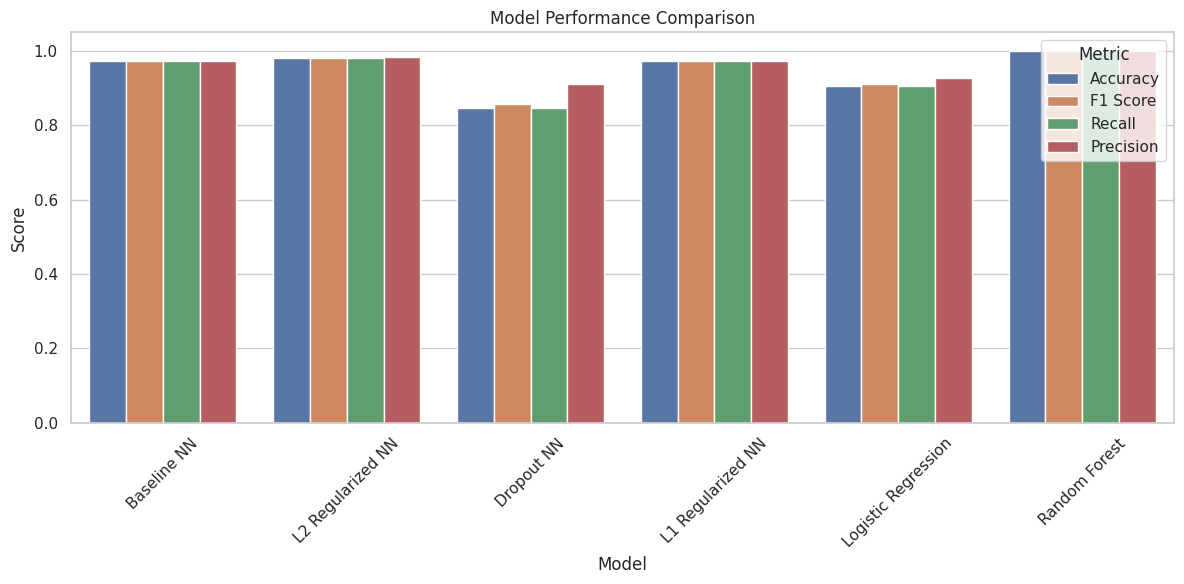


Best Performing Model:
--------------------------------------------------
Model: Random Forest
Configuration: GridSearchCV Optimized
F1 Score: 0.9998
Accuracy: 0.9998
Recall: 0.9998
Precision: 0.9998


In [51]:
# Compare All Models

# Add Random Forest results
results.append({
    'name': 'Random Forest',
    'config': 'GridSearchCV Optimized',
    'metrics': rf_metrics
})

# Create comparison DataFrame
comparison_df = pd.DataFrame([
    {
        'Model': r['name'],
        'Configuration': r['config'],
        'Accuracy': r['metrics']['accuracy'],
        'F1 Score': r['metrics']['f1'],
        'Recall': r['metrics']['recall'],
        'Precision': r['metrics']['precision']
    }
    for r in results
])

# Display results
print("Model Comparison:")
print("-" * 100)
display(comparison_df.round(4))

# Plot comparison
metrics_to_plot = ['Accuracy', 'F1 Score', 'Recall', 'Precision']
comparison_melted = pd.melt(comparison_df,
                          id_vars=['Model'],
                          value_vars=metrics_to_plot,
                          var_name='Metric',
                          value_name='Score')

plt.figure(figsize=(12, 6))
sns.barplot(data=comparison_melted, x='Model', y='Score', hue='Metric')
plt.xticks(rotation=45)
plt.title('Model Performance Comparison')
plt.tight_layout()
plt.show()

# Find the best model based on F1 score
best_model_idx = comparison_df['F1 Score'].idxmax()
best_model = comparison_df.iloc[best_model_idx]

print("\nBest Performing Model:")
print("-" * 50)
print(f"Model: {best_model['Model']}")
print(f"Configuration: {best_model['Configuration']}")
print(f"F1 Score: {best_model['F1 Score']:.4f}")
print(f"Accuracy: {best_model['Accuracy']:.4f}")
print(f"Recall: {best_model['Recall']:.4f}")
print(f"Precision: {best_model['Precision']:.4f}")


# Step 9: Model Visualization


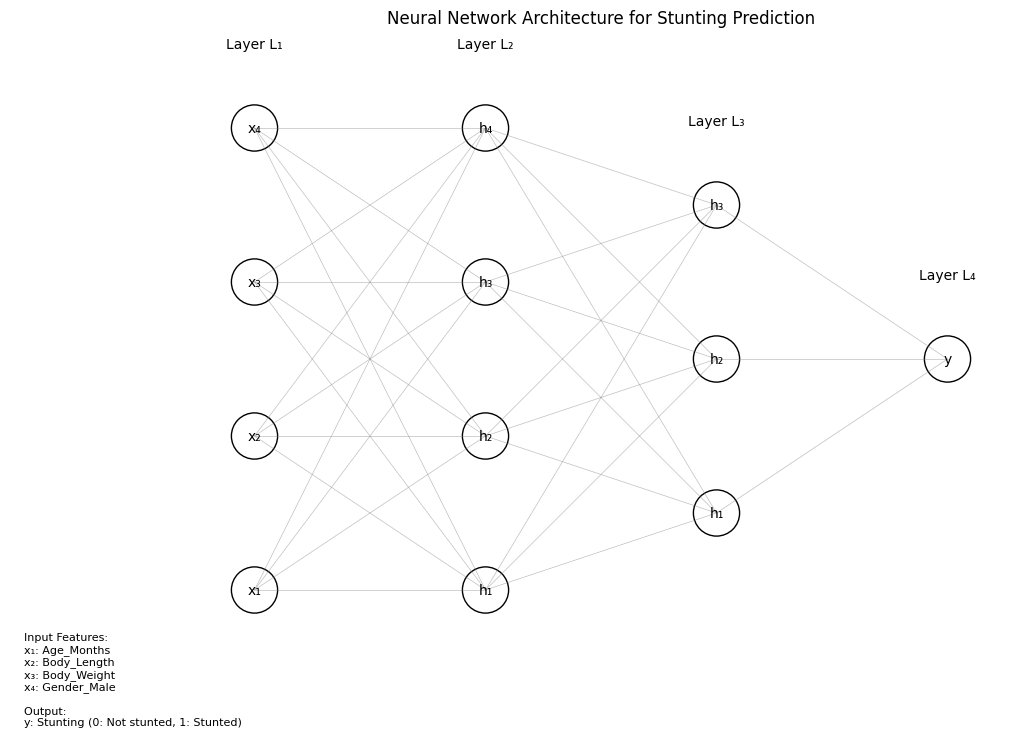

In [63]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle, Arrow
from matplotlib.collections import PatchCollection

def create_neural_network_diagram():
    # Set up the figure with white background
    plt.style.use('default')
    fig, ax = plt.subplots(figsize=(12, 8), facecolor='white')
    ax.set_aspect('equal')

    # Define layer sizes
    layer_sizes = [4, 4, 3, 1]  # [input, hidden1, hidden2, output]
    layer_names = ['L₁', 'L₂', 'L₃', 'L₄']
    node_labels = [
        ['x₁', 'x₂', 'x₃', 'x₄'],
        ['h₁', 'h₂', 'h₃', 'h₄'],
        ['h₁', 'h₂', 'h₃'],
        ['y']
    ]

    # Parameters for visualization
    vertical_spacing = 2
    horizontal_spacing = 3
    node_radius = 0.3

    # Calculate positions for each node
    layer_positions = []
    for i, size in enumerate(layer_sizes):
        layer_y = np.linspace(-(size-1)*vertical_spacing/2, (size-1)*vertical_spacing/2, size)
        layer_x = np.ones_like(layer_y) * i * horizontal_spacing
        layer_positions.append(np.column_stack([layer_x, layer_y]))

    # Draw connections first (so they appear behind nodes)
    for i in range(len(layer_sizes)-1):
        for start in layer_positions[i]:
            for end in layer_positions[i+1]:
                ax.plot([start[0], end[0]], [start[1], end[1]], 'gray', alpha=0.5, linewidth=0.5)

    # Draw nodes and labels
    for layer_idx, (positions, labels) in enumerate(zip(layer_positions, node_labels)):
        for pos, label in zip(positions, labels):
            circle = Circle(pos, node_radius, facecolor='white', edgecolor='black')
            ax.add_patch(circle)
            ax.text(pos[0], pos[1], label, ha='center', va='center')

        # Add layer labels
        y_pos = max(positions[:, 1]) + vertical_spacing/2
        ax.text(positions[0, 0], y_pos, f'Layer {layer_names[layer_idx]}',
                ha='center', va='bottom')

    # Set plot limits and remove axes
    ax.set_xlim(-1, (len(layer_sizes)-1)*horizontal_spacing + 1)
    ax.set_ylim(-(max(layer_sizes)-1)*vertical_spacing/2 - 1,
                (max(layer_sizes)-1)*vertical_spacing/2 + 1)
    ax.axis('off')

    # Add title and feature descriptions
    plt.title('Neural Network Architecture for Stunting Prediction', pad=20)
    feature_desc = """
    Input Features:
    x₁: Age_Months
    x₂: Body_Length
    x₃: Body_Weight
    x₄: Gender_Male

    Output:
    y: Stunting (0: Not stunted, 1: Stunted)
    """
    plt.figtext(0.02, 0.02, feature_desc, fontsize=8, ha='left', va='bottom')

    # Save the figure with high resolution
    plt.savefig('neural_network_architecture.png',
                dpi=300,
                bbox_inches='tight',
                facecolor='white',
                edgecolor='none')
    plt.show()

# Generate and display the diagram
create_neural_network_diagram()